# Neural Networks from Scratch in Python
### Written by Zachary Pulliam

This iPythonNotebook is used to load a portion of the MNIST dataset conatining 0's, 1's, 2's, 3's, and 4's into training and testing subsets. Then, create, train, and test a neural network on the data. metrics are reported overal, as well as on each subset of values 0 to 4. Individual images and their predictions are also displayed.

In [1]:
import os
from nn import NN
from datasets import MNISTDataset_0_4_train, MNISTDataset_0_4_test


""" Variables for the user to change"""
ROOT = ''  # path to root folder
arch_0_4 = os.path.join(ROOT, 'architecture_0_4.txt')  # path to architecture file 0 to 4 classification 

train = MNISTDataset_0_4_train(os.path.join(ROOT, 'data'))  # training data
test = MNISTDataset_0_4_test(os.path.join(ROOT, 'data'))  # testing data

nn = NN(arch_0_4)  # create NN
nn.train(train.x, train.y, 10)  # train NN
nn.test(test.x, test.y)  # test NN



Before training...
     Training Accuracy: 0.155
------------------------------
Epoch: 1 of 10
     Training Accuracy: 0.537
Epoch: 2 of 10
     Training Accuracy: 0.685
Epoch: 3 of 10
     Training Accuracy: 0.763
Epoch: 4 of 10
     Training Accuracy: 0.81
Epoch: 5 of 10
     Training Accuracy: 0.833
Epoch: 6 of 10
     Training Accuracy: 0.849
Epoch: 7 of 10
     Training Accuracy: 0.86
Epoch: 8 of 10
     Training Accuracy: 0.868
Epoch: 9 of 10
     Training Accuracy: 0.874
Epoch: 10 of 10
     Training Accuracy: 0.881
------------------------------
Testing Accuracy: 0.896


In [3]:
import numpy as np

ids = [[],[],[],[],[]]
for i, arr in enumerate(test.y):
    id = np.argmax(arr)
    ids[id].append(i)

zeros_x, zeros_y = [test.x[i] for i in ids[0]], [test.y[i] for i in ids[0]]
ones_x, ones_y = [test.x[i] for i in ids[1]], [test.y[i] for i in ids[1]]
twos_x, twos_y = [test.x[i] for i in ids[2]], [test.y[i] for i in ids[2]]
threes_x, threes_y = [test.x[i] for i in ids[3]], [test.y[i] for i in ids[3]]
fours_x, fours_y = [test.x[i] for i in ids[4]], [test.y[i] for i in ids[4]]

a = [[zeros_x, zeros_y], [ones_x, ones_y], [twos_x, twos_y], [threes_x, threes_y], [fours_x, fours_y]]

print('Testing Accuracies on Each Class 0 to 4')
print('---------------------------------------')

k = 0
for i in a:
    print('{x}\'s '.format(x=k), end='')
    k+=1
    nn.test(i[0], i[1])  # test NN


Testing Accuracies on Each Class 0 to 4
---------------------------------------
0's Testing Accuracy: 0.907
1's Testing Accuracy: 0.959
2's Testing Accuracy: 0.778
3's Testing Accuracy: 0.891
4's Testing Accuracy: 0.939


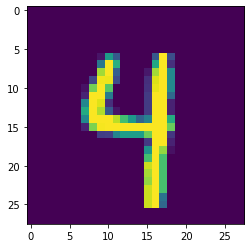

Model predicton: 4


In [13]:
import random
import numpy as np
from matplotlib import pyplot as plt

i = random.randint(0, len(test.x))
arr = test.x[i]

output = nn.predict(arr)

arr = np.reshape(arr, (28, 28))
plt.imshow(arr, interpolation='nearest')
plt.show()

print('Model predicton:', output)